The code below is primarily to analyse the margins of political parties in various elections. 

In [1]:
import pandas as pd 
import pylab as pl
import numpy as np

The excel file below contains the different sheets corresponding to the 2009 and 2014 general elections. They are imported. 

In [2]:
fil_name = 'Combined.xlsx'
sh_name_2014 = 'Candidates_PCwise_2014'
sh_name_2009 = 'CandidateResult2009'

def read_excel(fil_name = 'Custom_2009.xls', sh_name = 'Cand_Wise_2009'):
	df = pd.read_excel(fil_name,sheet_name = sh_name)
	return df

df_2009 = read_excel(fil_name, sh_name_2009)
df_2014 = read_excel(fil_name, sh_name_2014)

Once the files are imported, the next step is to run a preliminary analysis to explore the distribution of total votes polled across different constituencies in the two elections. 

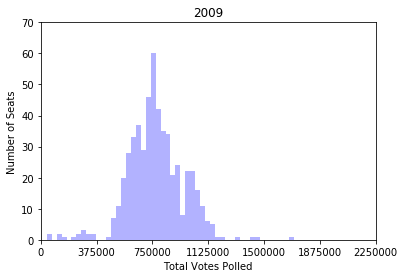

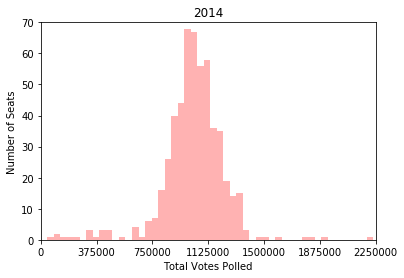

In [3]:
def plot_hist_votes_polled(dframe = df_2009, color = 'blue', pl_flag = 0, title = '2009'):
	Cons_votes = dframe.groupby(['PC_NAME'])['TOTAL_VOTES_POLLED'].sum() #Gives the total votes polled in each constituency
	if pl_flag == 1:
		pl.figure()
		pl.hist(Cons_votes.values, 50, color = color, alpha = 0.3)
        pl.xlabel('Total Votes Polled')
        pl.ylabel('Number of Seats')
        pl.title(title)
        pl.xlim(0,2250000)
        pl.ylim(0,70)
        pl.xticks(np.linspace(0,2250000, 7))
plot_hist_votes_polled(dframe = df_2009, color = 'blue', pl_flag = 1, title = '2009')
plot_hist_votes_polled(dframe = df_2014, color = 'red', pl_flag = 1, title = '2014')
pl.show()

As can be seen in the above graphs, the number of votes polled in 2014 increased significantly compared to the votes in 2009. For comparison, the voting percentage distributions in 2009 and 2014 are shown below. 

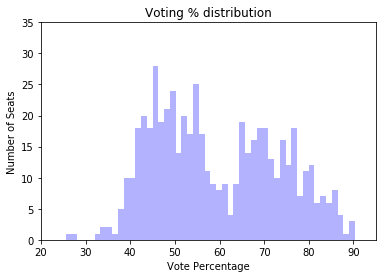

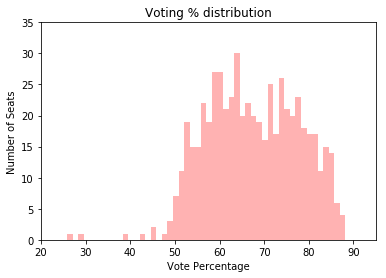

In [4]:
df_electors_2009 = read_excel(fil_name,sh_name = 'Electors2009') 
df_electors_2014 = read_excel(fil_name,sh_name = 'Electors2014') 

def plot_vote_percent(dframe = df_electors_2009, color = 'blue', title = '2009'):
    pl.figure()
    pl.hist(dframe.POLL_PERCENTAGE, 50, color = color, alpha = 0.3)
    pl.xlabel('Vote Percentage')
    pl.ylabel('Number of Seats')
    pl.title('Voting % distribution')
    pl.xlim(20,95)
    pl.ylim(0,35)
plot_vote_percent(df_electors_2009, color = 'blue', title = '2009')
plot_vote_percent(df_electors_2014, color = 'red', title = '2014')

An interesting pattern is observed when comparing the voting percentage distribution in 2009 and 2014. In 2009 the distribution is clearly bimodal. Though the 2014 distribution also shows bimodality it is far less pronounced. The above graphs indicate that the low voter turnout constituencies in 2009, increased their voting percentage in 2014. Which regions they belonged to, can be seen in the map based visualisation. 

Next, it would be interesting to compare the winning margins of in all constituencies in 2009 and 2014. 

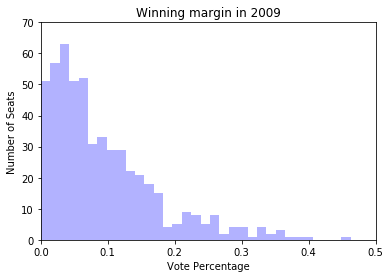

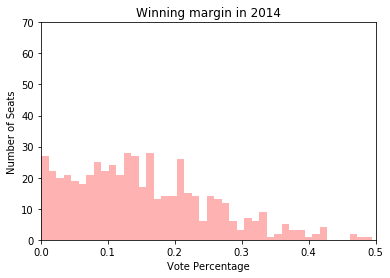

In [5]:
def plot_margin_dist(dframe = df_2009, color = 'blue', pl_flag = 0, title_val = '2009'):
    ss = dframe.groupby(['PC_NAME'])['TOTAL_VOTES_POLLED'].nlargest(100).reset_index() 
    const_name_lis = []
    pol_part_lis = []
    margin_lis = []
    tot_votes_lis = []
    marg_per_lis = []

    for ii in dframe['PC_NAME'].unique():
        ff = dframe[dframe['PC_NAME'] == ii]
        ff = ff.sort_values(['TOTAL_VOTES_POLLED'], ascending = False)
        margin = ff['TOTAL_VOTES_POLLED'].diff(periods = -1).values[0]
        const_name_lis.append(ii)
        pol_part_lis.append(ff['PARTY_ABB'].values[0])
        margin_lis.append(int(margin))
        tot_votes_lis.append(sum(ff['TOTAL_VOTES_POLLED']))
        marg_per_lis.append(margin/ sum(ff['TOTAL_VOTES_POLLED']))

    df_marg = pd.DataFrame({'Margin': margin_lis, 'Party': pol_part_lis, 'Constituency': const_name_lis, 'Votes': tot_votes_lis, 'Per_Margin': marg_per_lis})
    if pl_flag == 1:
        pl.figure()
        pl.hist(df_marg.Per_Margin, 50, color = color, alpha = 0.3)
        pl.xlabel('Vote Percentage')
        pl.ylabel('Number of Seats')
        pl.title('Winning margin in '+ title_val)
        pl.xlim(0,0.5)
        pl.ylim(0,70)
    return df_marg

df_marg_2009 = plot_margin_dist(dframe = df_2009, color = 'blue', title_val = '2009', pl_flag = 1)
df_marg_2014 = plot_margin_dist(dframe = df_2014, color = 'red', title_val = '2014', pl_flag = 1)

As can be seen, the distribution in 2014 is more uniform than the one in 2009 indicating that there were more bigger wins in 2014. So how does it reflect in the single biggest parties' margins in both the elections. 

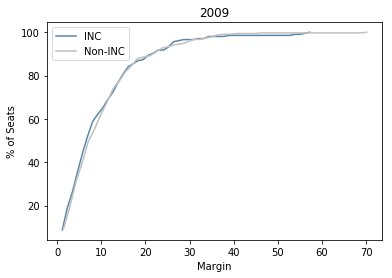

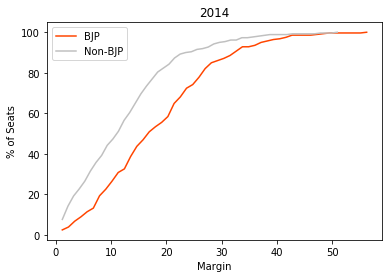

In [6]:
#INC margins in 2009
cong_marg_2009 = df_marg_2009[df_marg_2009['Party'] == 'INC']
#Non- INC win margins in 2009
non_cong_marg_2009 = df_marg_2009[df_marg_2009['Party'] != 'INC']

#BJP margins in 2014
bjp_marg_2014 = df_marg_2014[df_marg_2014['Party'] == 'BJP']
#Non- BJP win margins in 2014
non_bjp_marg_2014 = df_marg_2014[df_marg_2014['Party'] != 'BJP']

def cum_dis_marg(dframe = cong_marg_2009, label_flag = 1, color = 'blue', label = 'INC', title = '2009'):
    aa,bb = np.histogram(dframe.Per_Margin, 50)
    aa = [float(ii) for ii in aa]
    aa = np.cumsum(np.array(aa)/sum(aa))
    pl.plot(bb[1:] * 100,aa * 100, color = color, label = label)
    if label_flag == 1:
        pl.xlabel ('Margin')
        pl.ylabel('% of Seats')
        pl.title(title)
        pl.legend()
pl.figure()
cum_dis_marg(dframe = cong_marg_2009, label_flag = 0, color = '#5886a6', label = 'INC')
cum_dis_marg(dframe = non_cong_marg_2009, label_flag = 1, color = '#C0C0C0', title = '2009', label = 'Non-INC')
pl.figure()
cum_dis_marg(dframe = bjp_marg_2014, label_flag = 0, color = '#FF4500', label = 'BJP')
cum_dis_marg(dframe = non_bjp_marg_2014, label_flag = 1, color = '#C0C0C0', title = '2014', label = 'Non-BJP')

As can be clearly seen above, the patterns of BJP's and Congress's victories in 2014 and 2009 are quite different. In the sense, BJP's victories have been more emphatic than their competitors. Whereas for Congress, there is not much of a difference in the quality of their victories compared their competitors. It would be interesting to compare how they do in their seats they lose too.

Get the losing margin for the chosen party

In [7]:
def losing_margin(party, dframe):
    df_party_lost = df_2009[(df_2009['PARTY_ABB'] == party)&(df_2009['POSITION'] != 1)] 
    df_party_lost = df_2009[df_2009['PC_NAME'].isin(df_party_lost['PC_NAME'])] 

    margin_lis = []
    const_name_lis = []
    tot_votes_lis = []
    marg_per_lis = []
    #Get the difference between the top value and BJP value in each 
    for ii in df_party_lost['PC_NAME'].unique():
        ff = df_party_lost[df_party_lost['PC_NAME'] == ii]
        ff = ff.sort_values(['TOTAL_VOTES_POLLED'], ascending = False)
        winning_votes = ff['TOTAL_VOTES_POLLED'].values[0]
        party_row = ff[ff['PARTY_ABB'] == party]
        margin = winning_votes - party_row['TOTAL_VOTES_POLLED'].values[0] 
        const_name_lis.append(ii)
        margin_lis.append(int(margin))
        tot_votes_lis.append(sum(ff['TOTAL_VOTES_POLLED']))
        marg_per_lis.append(float(margin)/sum(ff['TOTAL_VOTES_POLLED']))

    party_lost_df = pd.DataFrame({'Margin': margin_lis, 'Constituency': const_name_lis, 'Votes': tot_votes_lis, 'MargPercent': marg_per_lis})
    return party_lost_df

Get the losing margins for BJP and Congress in 2014 and 2009 respectively.

In [8]:
cong_lost_2009 = losing_margin(party = 'INC', dframe = df_2009)
bjp_lost_2014 = losing_margin(party = 'BJP', dframe = df_2014)

Next step is to plot the winning-losing cdf comparisons for the 2009 and 2014 elections for the BJP and the Congress. 

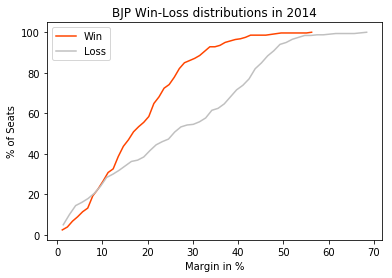

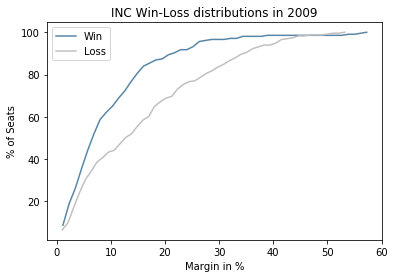

In [9]:
def plot_win_loss(party, dframe_win, dframe_loss, color_win, color_loss, Year):
    aa,bb = np.histogram(dframe_win.Per_Margin, 50)
    aa = [float(ii) for ii in aa]
    aa = np.cumsum(np.array(aa)/sum(aa))
    pl.figure()
    pl.plot(bb[1:]*100, aa*100, label = 'Win', color = color_win)
    pl.title(party + ' Win-Loss distributions in ' +Year)
    pl.ylabel('% of Seats')
    
    aa,bb = np.histogram(dframe_loss.MargPercent, 50)
    aa = [float(ii) for ii in aa]
    aa = np.cumsum(np.array(aa)/sum(aa))
    pl.plot(bb[1:]*100, aa*100, label = 'Loss', color = color_loss)
    pl.ylabel('% of Seats')
    pl.xlabel('Margin in %')
    pl.legend()
    
plot_win_loss(party = 'BJP', dframe_win = bjp_marg_2014, dframe_loss = bjp_lost_2014, color_win = '#FF4500', color_loss = '#C0C0C0', Year = '2014')
plot_win_loss(party = 'INC', dframe_win = cong_marg_2009, dframe_loss = cong_lost_2009, color_win = '#5886a6', color_loss = '#C0C0C0', Year = '2009')

Quick Observations:
1. Though the patterns of win-loss are similar for 2009 and 2014, quantitatively they are very dissimilar.
2. 2009 elections were much more closely contested for the winning party than 2014. 
3. For example, if the minimum margin is made as. 10%, BJP in 2014 would have won 20% less seats and lost 20% fewer seats. However, Congress in 2009 would have won 65% fewer seats and lost 45% fewer seats. 
4. Also, below 10% the pattern flips for BJP in 2014. They have lost more closely fought contests than they have won. 
5. Comparing the losses for Congress and BJP in 2009 and 2014, the losses for Congress were less severe. If the winning margin was kept at 20% - Congress would not have lost 65% of their seats. But BJP would not have lost only 35% of their seats. 
6. Further, the above graphs also show that the INC would suffer a huge loss, even for a small decrease in their vote share. For example, if they lost 10% of their votes they would lose around 65% of their seats. In fact, in 2009 they lost 78% of their seats with a loss in vote share of around 7% (the specific value for the seats that they had in 2009 still needs to be studied). The alliances and multi-polar contests further accentuated Congress' losses.  
7. On the other hand, the BJP would lose only 20% of the seats that they won, even if they lose 10% in each of them. 